In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 모듈 불러오기

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

In [4]:
# 1. Raw Data Loading

df = pd.read_csv('/content/drive/MyDrive/한국SW산업협회 교육-Java 과정/파이썬 실습/cat_dog_full.csv')
display(df.head(), df.shape) # (25000, 6401)
  # 6401 에서 1 : 개인지 고양이인지 표기

,label,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,1,204,205,205,209,201,212,216,215,216,...,121,125,124,18,18,17,18,44,48,55
1,1,60,56,59,60,65,70,66,67,67,...,145,144,156,143,152,152,150,145,140,145
2,0,156,144,140,151,120,136,152,150,156,...,217,210,99,214,217,216,218,216,214,214
3,1,98,91,123,120,76,110,88,110,76,...,203,207,221,236,242,233,217,217,217,219
4,0,176,162,130,153,143,107,132,148,164,...,89,97,99,105,106,105,103,101,97,89


(25000, 6401)

In [5]:
# 2. 이미지 데이터(픽셀 정보), 라벨 데이터 
label_data = df['label'].values
img_data = df.drop('label', axis=1, inplace=False).values # 2차원 ndarray

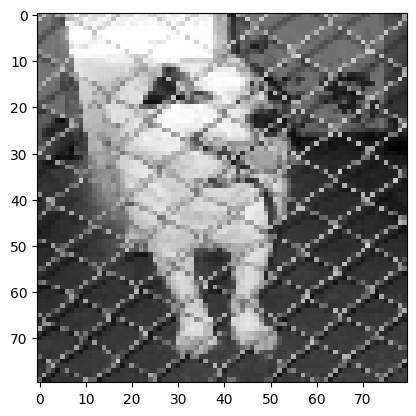

In [6]:
# 3. 샘플 이미지 확인
plt.imshow(img_data[150:151].reshape(80,80), cmap='gray')
plt.show()

In [7]:
# 4. data split (train 7 : test 3)
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(img_data, label_data, test_size=0.3, random_state=0)

In [8]:
# 5. 정규화 처리
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)

scaler.fit(x_data_test)
x_data_test_norm = scaler.transform(x_data_test)

In [9]:
# Model 생성

# 학습 데이터 가공
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding='same', 
                 input_shape=(80,80,1)))
model.add(MaxPooling2D(pool_size=(2,2))) # 이미지 크기 줄이기

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, 
                 kernel_size=(3,3), 
                 padding='same', 
                 activation='relu'))
model.add(Conv2D(filters=128, 
                 kernel_size=(3,3), 
                 padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 padding='same', 
                 activation='relu'))
model.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
# Input Layer
model.add(Flatten())

# Dropout Layer
model.add(Dropout(rate=0.5))

# Hidden Layer
model.add(Dense(units=256, 
                kernel_initializer='he_normal',
                activation='relu'))

# Output Layer
model.add(Dense(units=1,
                kernel_initializer='he_normal',
                activation='sigmoid'))
# units=1
  # 결과에는 이미지 하나 당 개인지 고양이인지 판단만 하면 된다.

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 128)       1

In [11]:
# 학습 실행

# Optimizer
model.compile(optimizer=RMSprop(learning_rate=1e-4), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Learning
history = model.fit(x_data_train_norm.reshape(-1,80,80,1), 
                    t_data_train.reshape(-1,1), 
                    epochs=100, 
                    batch_size=100, 
                    verbose=1, 
                    validation_split=0.3)
# x_data_train_norm.reshape(-1,80,80,1)
  # CNN에서는 입력이 무조건 4차원이어야 한다.

Epoch 1/100
123/123 [==============================] - 19s 45ms/step - loss: 0.6917 - accuracy: 0.5232 - val_loss: 0.6891 - val_accuracy: 0.5097
Epoch 2/100
123/123 [==============================] - 4s 35ms/step - loss: 0.6830 - accuracy: 0.5544 - val_loss: 0.6730 - val_accuracy: 0.5739
Epoch 3/100
123/123 [==============================] - 4s 36ms/step - loss: 0.6643 - accuracy: 0.6000 - val_loss: 0.6621 - val_accuracy: 0.5880
Epoch 4/100
123/123 [==============================] - 5s 38ms/step - loss: 0.6413 - accuracy: 0.6275 - val_loss: 0.6679 - val_accuracy: 0.5886
Epoch 5/100
123/123 [==============================] - 4s 36ms/step - loss: 0.6229 - accuracy: 0.6503 - val_loss: 0.6051 - val_accuracy: 0.6714
Epoch 6/100
123/123 [==============================] - 4s 36ms/step - loss: 0.5980 - accuracy: 0.6728 - val_loss: 0.6056 - val_accuracy: 0.6657
Epoch 7/100
123/123 [==============================] - 5s 38ms/step - loss: 0.5729 - accuracy: 0.6999 - val_loss: 0.5668 - val_accuracy

In [12]:
# Evaluation
print(model.evaluate(x_data_test_norm.reshape(-1,80,80,1), 
                     t_data_test.reshape(-1,1)))

235/235 [==============================] - 2s 6ms/step - loss: 0.8190 - accuracy: 0.8476
[0.8189677000045776, 0.847599983215332]


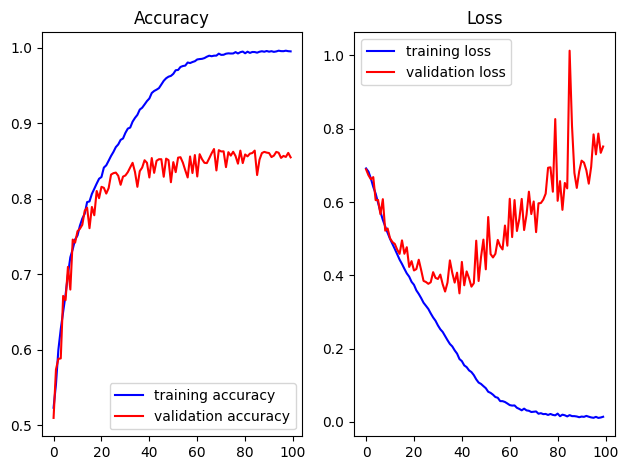

In [13]:
# 결과 그래프

train_acc = history.history['accuracy']
train_loss = history.history['loss']

validation_acc = history.history['val_accuracy']
validation_loss = history.history['val_loss']

fig = plt.figure()
fig_1 = fig.add_subplot(1,2,1)
fig_2 = fig.add_subplot(1,2,2)

fig_1.plot(train_acc, color='b', label='training accuracy')
fig_1.plot(validation_acc, color='r', label='validation accuracy')
fig_1.set_title('Accuracy')
fig_1.legend()

fig_2.plot(train_loss, color='b', label='training loss')
fig_2.plot(validation_loss, color='r', label='validation loss')
fig_2.set_title('Loss')
fig_2.legend()

plt.tight_layout()
plt.show()